In [14]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib as plt
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split

In [15]:
#Split values based on the two CSVs
training = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv")
testing = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv")

data = training
target = data['Survived'] 

In [46]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [16]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
# Show percentage survivors by sex and by class
pvt_train = pd.pivot_table(
    data=training, 
    index=['Survived'], 
    columns=['Embarked'], 
    values =['PassengerId'], 
    aggfunc='count'
)
pvt_train.apply(lambda x: x / (x.max() + x.min()))

PassengerId                   
Embarked           C        Q         S
Survived                               
0           0.446429  0.61039  0.663043
1           0.553571  0.38961  0.336957

In [18]:
training[training['Fare'] >= 100].Survived.value_counts()

1    39
0    14
Name: Survived, dtype: int64

In [19]:
training[training['Fare'] < 30].Survived.value_counts()

0    450
1    201
Name: Survived, dtype: int64

In [20]:
# Show percentage survivors by sex and by class
pvt_train = pd.pivot_table(
    data=training, 
    index=['Survived'], 
    columns=['Fare'], 
    values =['PassengerId'], 
    aggfunc='count'
)
pvt_train
# pvt_train.apply(lambda x: x / (x.max() + x.min()))

PassengerId                                                        \
Fare        0.0000   4.0125   5.0000   6.2375   6.4375   6.4500   6.4958     
Survived                                                                     
0                 14        1        1        1        1        1        2   
1                  1      NaN      NaN      NaN      NaN      NaN      NaN   

                                                                         \
Fare     6.7500   6.8583   6.9500   6.9750   7.0458   7.0500   7.0542     
Survived                                                                  
0               2        1        1        1        1        7        2   
1             NaN      NaN      NaN        1      NaN      NaN      NaN   

                                                                         \
Fare     7.1250   7.1417   7.2250   7.2292   7.2500   7.3125   7.4958     
Survived                                                                  
0               4      NaN        9       11       12        1        2   
1             NaN        1        3        4        1      NaN        1   

                                                                         \
Fare     7.5208   7.5500   7.6292   7.6500   7.7250   7.7292   7.7333     
Survived                                                                  
0               1        3        1        3        1        1        2   
1             NaN        1      NaN        1      NaN      NaN        2   

                                                                         \
Fare     7.7375   7.7417   7.7500   7.7750   7.7875   7.7958   7.8000     
Survived                                                                  
0               1        1       22       13      NaN        4        1   
1               1      NaN       12        3        1        2      NaN   

                                                                         \
Fare     7.8292   7.8542   7.8750   7.8792   7.8875   7.8958   7.9250     
Survived                                                                  
0               1       10        1      NaN        1       37       10   
1               1        3      NaN        4      NaN        1        8   

                                                                         \
Fare     8.0292   8.0500   8.1125   8.1375   8.1583   8.3000   8.3625     
Survived                                                                  
0             NaN       38      NaN        1        1        1        1   
1               1        5        1      NaN      NaN      NaN      NaN   

                                                                         \
Fare     8.4042   8.4333   8.4583   8.5167   8.6542   8.6625   8.6833     
Survived                                                                  
0               1        1        1      NaN        1       12      NaN   
1             NaN      NaN      NaN        1      NaN        1        1   

                                                                         \
Fare     8.7125   8.8500   9.0000   9.2167   9.2250   9.3500   9.4750     
Survived                                                                  
0               1        1        2        1        2        1        1   
1             NaN      NaN      NaN      NaN      NaN        1      NaN   

                                                                         \
Fare     9.4833   9.5000   9.5875   9.8250   9.8375   9.8417   9.8458     
Survived                                                                  
0               1        7        1        2        1      NaN        1   
1             NaN        2        1      NaN      NaN        1      NaN   

                                                                         \
Fare     10.1708  10.4625  10.5000  10.5167  11.1333  11.2417  11.5000    
Survived                                                                  
0        

Survived
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Fare, dtype: object

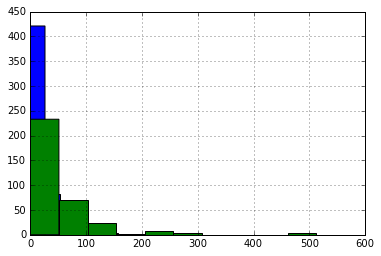

In [22]:
training.groupby('Survived').Fare.hist(alpha=0.4)

In [23]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA, RandomizedPCA

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC


In [24]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [31]:
pd.get_dummies(training['Embarked']).drop('S', axis=1)

,C,Q
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
5,0,1
6,0,0
7,0,0
8,0,0
9,1,0


In [34]:
X


,Age,Fare,Parch,Pclass,SibSp,female
0,22.00,7.2500,0,3,1,NaN
1,38.00,71.2833,0,1,1,NaN
2,26.00,7.9250,0,3,0,NaN
3,35.00,53.1000,0,1,1,NaN
4,35.00,8.0500,0,3,0,NaN
5,NaN,8.4583,0,3,0,NaN
6,54.00,51.8625,0,1,0,NaN
7,2.00,21.0750,1,3,3,NaN
8,27.00,11.1333,2,3,0,NaN
9,14.00,30.0708,0,2,1,NaN


In [36]:
X = pd.concat([training[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], sex], axis=1)

In [37]:
X

,Pclass,Age,SibSp,Parch,Fare,female
0,3,22.00,1,0,7.2500,0
1,1,38.00,1,0,71.2833,1
2,3,26.00,0,0,7.9250,1
3,1,35.00,1,0,53.1000,1
4,3,35.00,0,0,8.0500,0
5,3,NaN,0,0,8.4583,0
6,1,54.00,0,0,51.8625,0
7,3,2.00,3,1,21.0750,0
8,3,27.00,0,2,11.1333,1
9,2,14.00,1,0,30.0708,1


In [39]:
rf = RandomForestClassifier()

y = training['Survived']
sex = pd.get_dummies(training['Sex']).drop('male', axis=1)
X = pd.concat([training[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], sex], axis=1).fillna(0)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
rf.feature_importances_

array([ 0.09815446,  0.24189617,  0.04831114,  0.042862  ,  0.29110331,
        0.27767291])

In [41]:
X.columns

Index([u'Pclass', u'Age', u'SibSp', u'Parch', u'Fare', u'female'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C08FC88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000022192320>]], dtype=object)

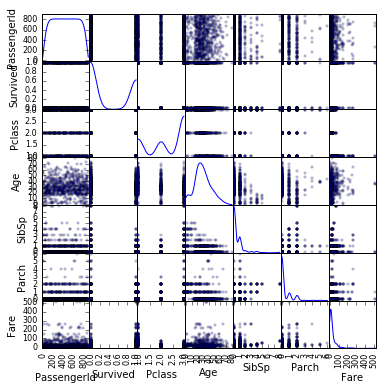

In [43]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(training, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [45]:
training.plot(kind='scatter')

ValueError: scatter requires and x and y column

In [50]:
testing_file = 'http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv'
def get_predictions(file_path=testing_file):
    predictions = {}
    df = pd.read_csv(file_path)
    for passenger_index, passenger in df.iterrows():
        passenger_id = passenger['PassengerId']
        predictions[passenger_id] = 0
        if passenger['Sex'] == 'female':
            predictions[passenger_id] = 1
        if passenger['Age'] < 18 and passenger['SibSp'] < 2 and passenger['Parch'] > 0:
            predictions[passenger_id] = 1
        if passenger['Fare'] > 250:
            predictions[passenger_id] = 1    
        if 'sson' in passenger['Name']:
            predictions[passenger_id] = 0
    return predictions

In [52]:
predictions = get_predictions()

In [57]:
pred = pd.DataFrame(pd.Series(predictions)).reset_index()
pred.columns = ['PassengerId', 'Survived']
pred.to_csv('Stupid_Fake_Model.csv', index=False)